In [1]:
import re
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

Dataset Link: [yelp review analysis kaggle](https://www.kaggle.com/datasets/thedevastator/yelp-reviews-sentiment-dataset?resource=download)

In [3]:
train_df = pd.read_csv("../dataset/train.csv")
test_df = pd.read_csv("../dataset/test.csv")

In [7]:
train_df.shape, test_df.shape

((560000, 2), (38000, 2))

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    560000 non-null  object
 1   label   560000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38000 non-null  object
 1   label   38000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 593.9+ KB


In [10]:
train_df.head()

,text,label
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,1


In [11]:
test_df.head()

,text,label
0,"Contrary to other reviews, I have zero complai...",1
1,Last summer I had an appointment to get new ti...,0
2,"Friendly staff, same starbucks fair you get an...",1
3,The food is good. Unfortunately the service is...,0
4,Even when we didn't have a car Filene's Baseme...,1


In [12]:
train_df.label.unique(), test_df.label.unique()

(array([0, 1], dtype=int64), array([1, 0], dtype=int64))

In [13]:
train_df.label.value_counts()

0    280000
1    280000
Name: label, dtype: int64

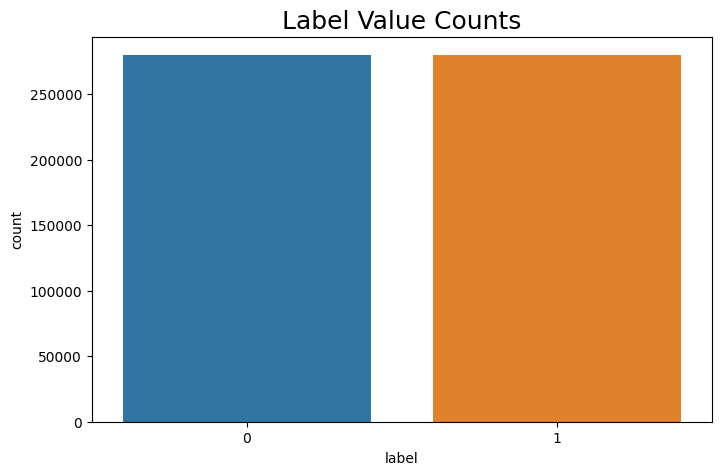

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x=train_df['label'])
plt.title("Label Value Counts", fontdict={'fontsize':18})
plt.show()

In [15]:
test_df.label.value_counts()

1    19000
0    19000
Name: label, dtype: int64

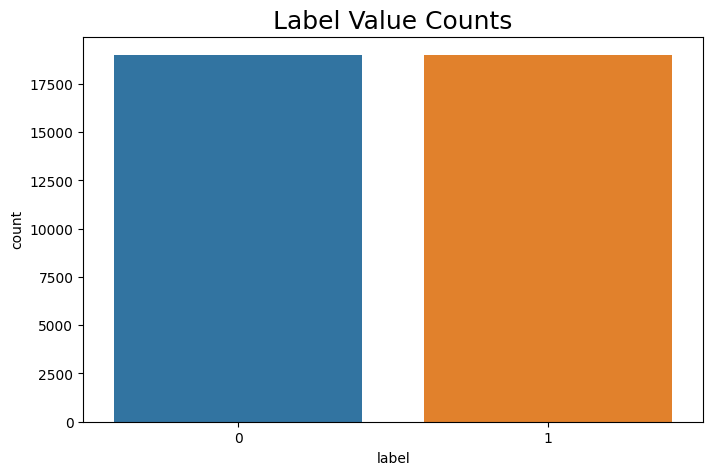

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x=test_df['label'])
plt.title("Label Value Counts", fontdict={'fontsize':18})
plt.show()

In [19]:
df = pd.concat([train_df, test_df], axis=0)
df.shape

(598000, 2)

In [20]:
df = df.sample(frac=1)

In [21]:
df.to_csv("../dataset/data.csv", index=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598000 entries, 54408 to 538732
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    598000 non-null  object
 1   label   598000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.7+ MB


In [17]:
df = pd.read_csv("../dataset/data.csv")

In [18]:
df.head()

,text,label
0,Called last night @ 4:30 and tried to do call ...,0
1,"As with all Teeters in the Charlotte area, thi...",1
2,Service experiences have been mixed: the bart...,0
3,Went here for the first time yesterday. I got ...,1
4,started off shaky as no one greeted us for abo...,1


In [19]:
def clean_junk(sntnc):
    all_letters = r"[A-Za-z ]+"

    removed_links = re.sub(r'http\S+', '', sntnc)

    cleaned_txt_list = re.findall(all_letters, removed_links)

    cleaned_txt = " ".join(cleaned_txt_list).lower()
    
    return cleaned_txt

In [20]:
df['text'] = df['text'].apply(clean_junk)

In [21]:
corpus = " ".join([snt for snt in df.text])

In [22]:
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(corpus)

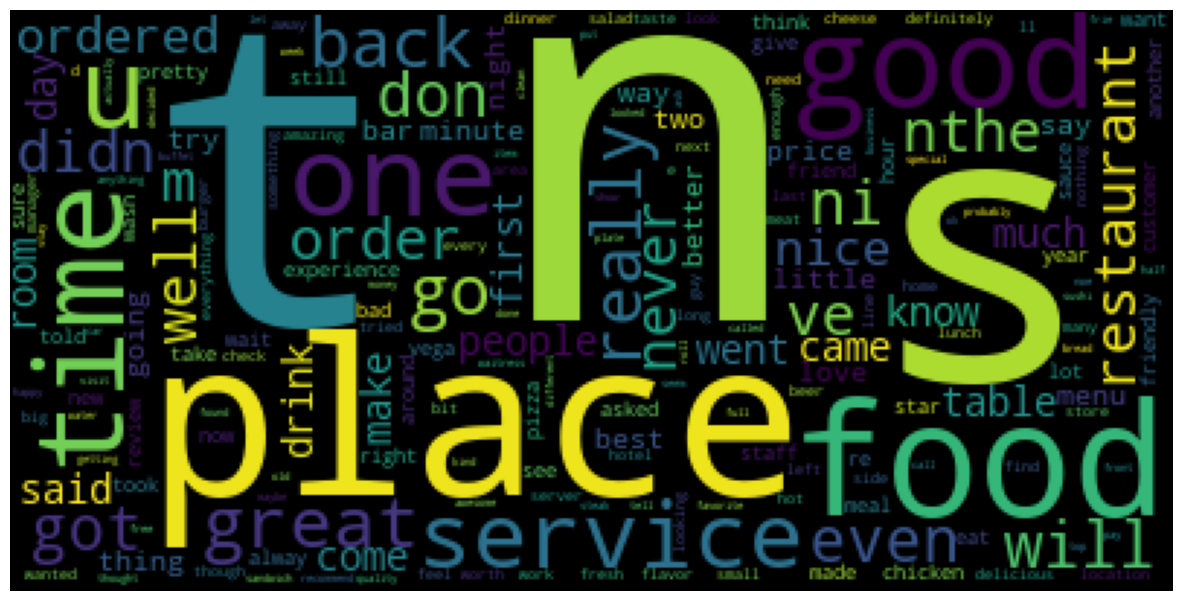

In [23]:
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
 
plt.show()